In [3]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as lin
import os
import pandas as pd
import seaborn as sns
import warnings
import seaborn as sns
import statistics

In [4]:
def load_robot_infos(filename):
     with open(filename) as file :
        csv_data = csv.reader(file,delimiter=';')
        fits = []
        evals = []
        trajs = []
        t = []
        state = 0
        for row in csv_data:
            if(state == 1):
                if(row[0] == "ctrl_genome"):
                    trajs.append(t)
                    t = []
                    state = 0
                else:
                    t.append([float(row[0].split(",")[0]),float(row[0].split(",")[1])])
                    continue
            if(row[0].split("_")[0] == "evaluation"):
                evals.append(int(row[0].split("_")[1]))
            elif(row[0] == "fitnesses"):
                fits.append(float(row[1]))
            elif(row[0] == "trajectory"):
                state = 1                
        return evals, fits, trajs

def load_ctrl_genomes(filename):
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=';')
        state = 0
        nbr_weights = []
        nbr_biases = []
        params = []
        param = []
        for row in csv_data:
            if(row[0] == "ctrl_genome"):
                state = 1
            elif(row[0].split("_")[0] == "evaluation"):
                state = 0
                params.append(param)
                param = []
            elif(state == 1):
                state+=1
            elif(state == 2):
                state+=1
                nbr_weights.append(int(row[0]))
            elif(state == 3):
                state+=1
                nbr_biases.append(int(row[0]))
            elif(state == 4):
                param.append(float(row[0]))
        return nbr_weights, nbr_biases, params[1:]
            

def get_generations(folder,_id):
    generations = []
    evals = []
    for file in os.listdir(folder):
        if(file.split("_")[0] == "learner" and int(file.split("_")[1]) == _id):
            generations.append(int(file.split("_")[2])-1)
            
            evals.append(int(file.split("_")[3]))
    return evals, generations
            

(0, 0.95)

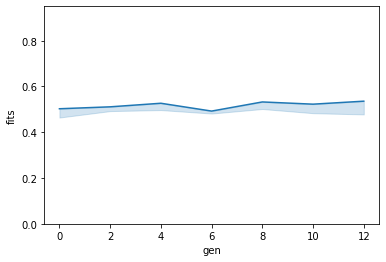

In [5]:
exp_folder = "/home/leni/are-logs/physical_corridor_results/smallL/"
lines = []
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_6262")
    evls, gens = get_generations(exp_folder + "/" + folder,6262)
    lines += [[e,f,g,"69","N=0;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])
ax=sns.lineplot(data=data,x="gen",y="fits",estimator=max)
ax.set_ylim(0,0.95)

(0, 0.95)

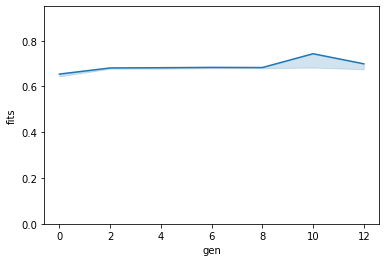

In [6]:
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_7622")
    evls, gens = get_generations(exp_folder + "/" + folder,7622)
    lines += [[e,f,g,"124","N=0;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])
ax=sns.lineplot(data=data,x="gen",y="fits",estimator=max)
ax.set_ylim(0,0.95)

(0, 0.95)

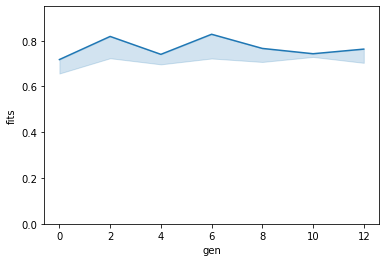

In [7]:
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_7212")
    evls, gens = get_generations(exp_folder + "/" + folder,7212)
    lines += [[e,f,g,"1","N=0;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])
ax=sns.lineplot(data=data,x="gen",y="fits",estimator=max)
ax.set_ylim(0,0.95)

In [8]:
exp_folder = "/home/leni/are-logs/physical_corridor_results/smallLN/"
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_6262")
    evls, gens = get_generations(exp_folder + "/" + folder,6262)
    lines += [[e,f,g,"69","N=1;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])

In [9]:
exp_folder = "/home/leni/are-logs/physical_corridor_results/smallLN/"
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_7622")
    evls, gens = get_generations(exp_folder + "/" + folder,7622)
    lines += [[e,f,g,"124","N=1;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])

In [11]:
exp_folder = "/home/leni/are-logs/physical_corridor_results/smallLN/"
for folder in os.listdir(exp_folder):
    evals, fits, trajs = load_robot_infos(exp_folder + "/" + folder + "/robot_infos_7212")
    evls, gens = get_generations(exp_folder + "/" + folder,7212)
    lines += [[e,f,g,"1","N=1;D=30"] for e,f,g in zip(evals,fits,gens)]
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])

In [12]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_6262"
evals, fits, trajs = load_robot_infos(folder)
evls, gens = get_generations("/home/leni/are-logs/physical_corridor_results/physical_corridor2/",6262)
lines += [[e,f,g,"69","N=0;D=60"] for e,f,g in zip(evals,fits,gens)]


In [13]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_7622"
evals, fits, trajs = load_robot_infos(folder)
evls, gens = get_generations("/home/leni/are-logs/physical_corridor_results/physical_corridor2/",7622)
lines += [[e,f,g,"124","N=0;D=60"] for e,f,g in zip(evals,fits,gens)]

In [14]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_7212"
evals, fits, trajs = load_robot_infos(folder)
evls, gens = get_generations("/home/leni/are-logs/physical_corridor_results/physical_corridor2/",7212)
lines += [[e,f,g,"1","N=0;D=60"] for e,f,g in zip(evals,fits,gens)]



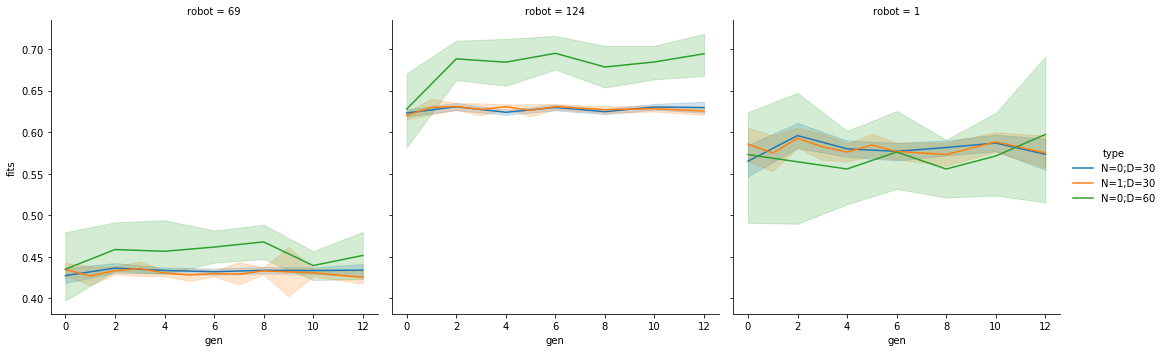

In [15]:
data = pd.DataFrame(data=lines,columns=["eval","fits","gen","robot","type"])
rel = sns.relplot(data=data,x="gen",y="fits",hue="type",col="robot",kind="line")

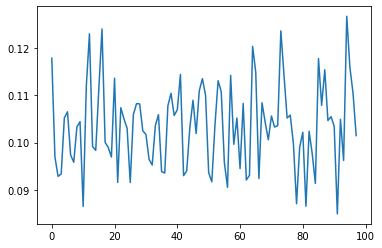

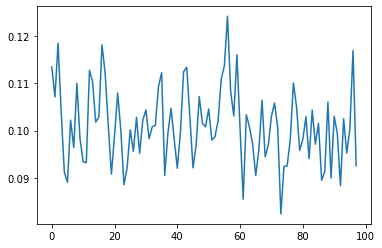

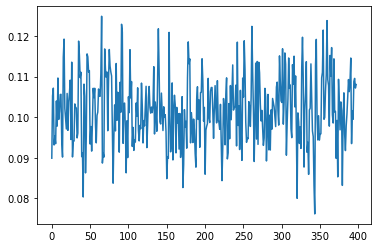

In [55]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor/robot_infos_7622"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_7622"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor3/robot_infos_7622"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()

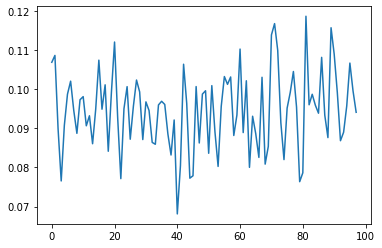

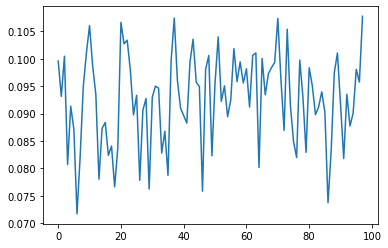

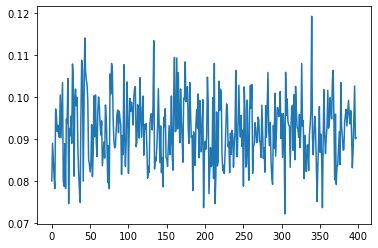

In [56]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor/robot_infos_6262"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_6262"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor3/robot_infos_6262"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()

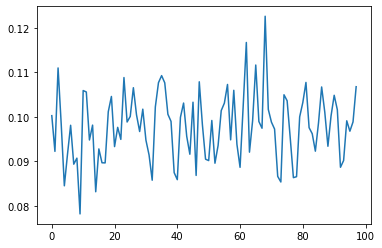

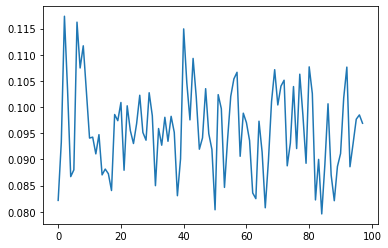

FileNotFoundError: [Errno 2] No such file or directory: '/home/leni/are-logs/physical_corridor_results/physical_corridor3/robot_infos_7212'

In [57]:
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor/robot_infos_7212"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor2/robot_infos_7212"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()
folder = "/home/leni/are-logs/physical_corridor_results/physical_corridor3/robot_infos_7212"
nbr_weights, nbr_biases, params = load_ctrl_genomes(folder)
distances = [ lin.norm(np.array(params[i-1])-np.array(params[i])) for i in range(1,len(params))]
plt.plot(distances)
plt.show()